# Partie ② Exploratory analysis
## Table of contents

- <a href="#C0">0. Importing pythion libraries and loading dataframe</a>
- <a href="#C1">1. Univariate analysis</a>
- <a href="#C2">2. Bivariate analysis</a>
- <a href="#C3">3. Other multivariate analysis</a>

# <a name="C0">0. Importing pythion libraries and loading dataframe</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib as mpl
from sklearn.impute import KNNImputer
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

from sklearn import decomposition
from sklearn import preprocessing

In [2]:
plt.rcdefaults()

In [3]:
pd.set_option('display.max_columns', None) # to show all columns
# pd.reset_option(“max_columns”) # to go back to default columns display
pd.set_option('display.max_rows', None) # to show all rows
# pd.reset_option(“max_rows”) # to go back to default columns display

In [4]:
df = pd.read_csv('cleaned.csv', sep='\t')

In [5]:
df.head()

,Unnamed: 0,created_datetime,code,product_name,energy_100g,proteins_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1
0,278057,2017-04-18 10:35:37,5410151409297,Olvarit Boisson Au Fenouil,75.0,0.0,4.5,0.0,4.6,0.0,0.0,0.0000,0.0,6.0,d,Beverages
1,211672,2016-09-28 10:25:04,3256225718894,Soda saveur Mojito,159.0,0.5,7.7,0.5,7.7,0.1,0.5,0.0250,0.0,12.0,e,Beverages
2,232049,2016-09-09 15:19:59,3421557501593,Muesli Lin et Courges,1862.0,13.0,4.2,17.6,53.4,2.4,10.4,0.0400,3.5,-3.0,a,Cereals and potatoes
3,179007,2015-02-04 16:14:29,20270261,Confiture de fraises - 75 % de fruits,768.0,0.6,39.0,0.3,43.0,0.3,2.2,0.0508,75.0,5.0,c,Sugary snacks
4,219491,2013-08-23 18:11:28,3270160818976,"Crevettes risotto-lait de coco-basilic thaï, s...",528.0,5.1,1.1,4.0,17.3,2.6,0.5,0.4572,17.2,1.0,b,Composite foods


# <a name="C1">1. Univaritate analysis</a>

## 1.1 Quantitative / Numerical features

In [6]:
df[['proteins_100g','salt_100g','sugars_100g','fat_100g','carbohydrates_100g','saturated-fat_100g',
   'fiber_100g']].describe()

,proteins_100g,salt_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g
count,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000
mean,7.723335,1.138952,13.219235,11.723449,25.804589,5.360208,1.808232
std,7.813941,4.033253,18.903827,14.418493,23.666832,8.444688,3.806994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000,0.080000,1.000000,2.400000,6.900000,0.300000,0.000000
50%,6.000000,0.560000,4.000000,8.000000,21.400000,1.900000,0.100000
75%,10.900000,1.244600,17.000000,15.000000,40.000000,7.300000,2.400000
max,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


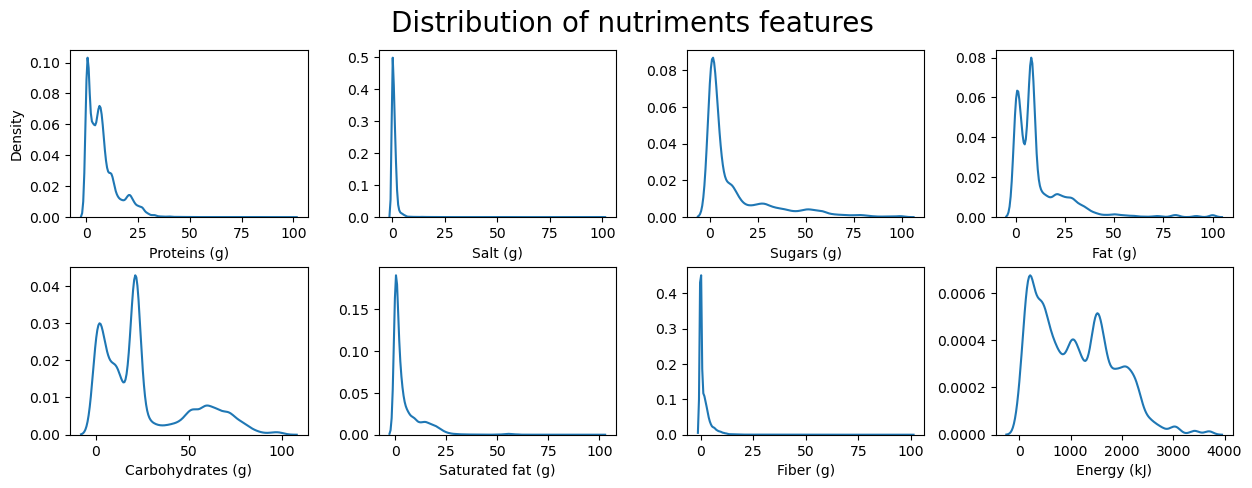

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
 
fig.suptitle('Distribution of nutriments features', fontsize=20, y=0.96)
color = ['#C5A0C9']
sns.set_palette(sns.color_palette(color))

sns.kdeplot(df['proteins_100g'], ax=axes[0, 0]).set(xlabel='Proteins (g)')
sns.kdeplot(df['salt_100g'], ax=axes[0, 1]).set(ylabel=None, xlabel='Salt (g)')
sns.kdeplot(df['sugars_100g'], ax=axes[0, 2]).set(ylabel=None, xlabel='Sugars (g)')
sns.kdeplot(df['fat_100g'], ax=axes[0, 3]).set(ylabel=None, xlabel='Fat (g)')
sns.kdeplot(df['carbohydrates_100g'], ax=axes[1, 0]).set(ylabel=None, xlabel='Carbohydrates (g)')
sns.kdeplot(df['saturated-fat_100g'], ax=axes[1, 1]).set(ylabel=None, xlabel='Saturated fat (g)')
sns.kdeplot(df['fiber_100g'], ax=axes[1, 2]).set(ylabel=None, xlabel='Fiber (g)')
sns.kdeplot(df['energy_100g'], ax=axes[1, 3]).set(ylabel=None, xlabel='Energy (kJ)')

#axes[2,2].set_visible(False)
plt.subplots_adjust(hspace = 0.3, wspace=0.3)
plt.savefig("distrubution_des_variables_nutriments.png", transparent=True, bbox_inches='tight')
plt.show()


In [8]:
df['created_datetime'] = pd.to_datetime(df['created_datetime'])

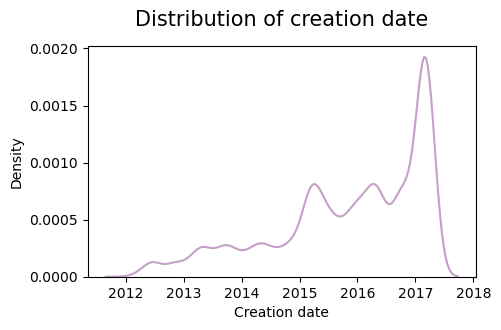

In [10]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df['created_datetime'])
plt.title('Distribution of creation date', fontsize=15, loc='center', y=1.05)
plt.xlabel('Creation date', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.savefig("distrubution_de_la_date_de_creation.png", transparent=True, bbox_inches='tight')
plt.show()

## 1.2 Qualitative features

### 1.2.1 Nutrigrade

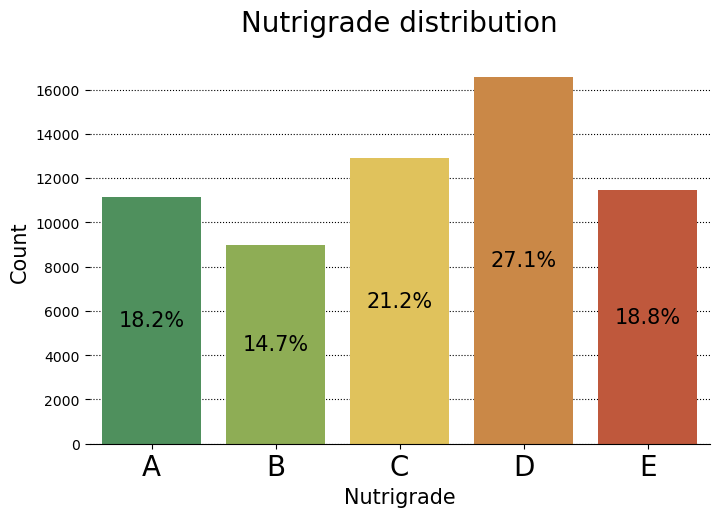

In [11]:
plt.subplots(figsize=[8,5])

colors = ["#449B57", "#92BB47",'#F6CE46','#E08831','#D54B26']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x=df['nutrition_grade_fr'],
                   order=['a','b','c','d','e'])
container = ax.containers[0]
df_len = len(df['nutrition_grade_fr'])
ax.bar_label(container,
             labels=[f'{x/df_len*100:.1f}%' for x in container.datavalues],
             label_type='center',
             size=15)
labels2 = ['A','B','C','D','E']
ax.set_xticklabels(labels2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', color='black', ls=':')
ax.set_axisbelow(True)
plt.title('Nutrigrade distribution', fontsize=20, y=1.05)
plt.xlabel('Nutrigrade', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.savefig("distrubution_du_nutrigrade.png", transparent=True, bbox_inches='tight')
plt.show()

### 1.2.2 Categories

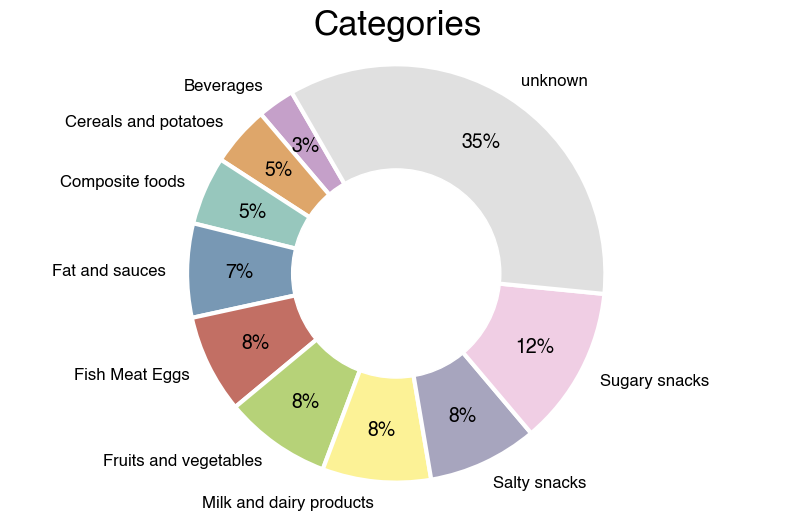

In [12]:
pie, ax = plt.subplots(figsize=[10,6])
colors = ['#C5A0C9','#DEA66A','#97C7BD','#7898B4','#C26F64','#B6D278','#FCF296','#A7A5BE','#F0CEE4','#E0E0E0']
sns.set_palette(sns.color_palette(colors))
sizes = df['pnns_groups_1'].value_counts().sort_index() / df['pnns_groups_1'].value_counts().sum() * 100
wedges, labels, autopct = plt.pie(sizes.sort_values(),
        labels=sizes.index,
        autopct='%.0f%%',
        textprops={'fontsize': 14, 'fontname':'Helvetica'},
        startangle=120,
        labeldistance=1.1,
        pctdistance=0.75,
        radius=1,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors=colors
        )
plt.axis('equal')
plt.title('Categories', fontsize=25, loc='center', **{'fontname':'Helvetica'})
plt.setp(labels, fontsize=12)

# Ajout d'un cercle pour faire un donut
my_circle=plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("categories.png", transparent=True, bbox_inches='tight')
plt.show()

# <a name="C2">2. Bivariate analysis</a>

## 2.1 Boxplot between nutriments and nutrigrade

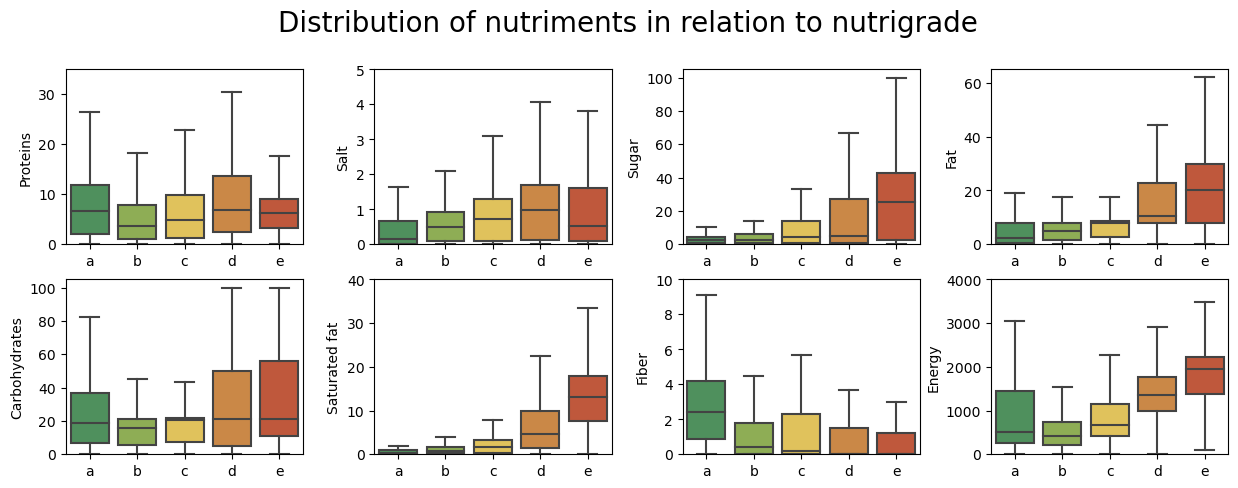

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
colors = ["#449B57", "#92BB47",'#F6CE46','#E08831','#D54B26']
sns.set_palette(sns.color_palette(colors))
fig.suptitle('Distribution of nutriments in relation to nutrigrade', fontsize=20, y=1)
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['proteins_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[0, 0]).set(ylim=(0, 35), xlabel=None, ylabel='Proteins');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['salt_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[0, 1]).set(ylim=(0, 5), xlabel=None, ylabel='Salt');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['sugars_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[0, 2]).set(ylim=(0, 105), xlabel=None, ylabel='Sugar');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['fat_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[0, 3]).set(ylim=(0, 65), xlabel=None, ylabel='Fat');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['carbohydrates_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[1, 0]).set(ylim=(0, 105), xlabel=None, ylabel='Carbohydrates');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['saturated-fat_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[1, 1]).set(ylim=(0, 40), xlabel=None, ylabel='Saturated fat');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['fiber_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[1, 2]).set(ylim=(0, 10), xlabel=None, ylabel='Fiber');
sns.boxplot(x=df['nutrition_grade_fr'],
            y=df['energy_100g'],
            order=['a', 'b', 'c', 'd', 'e'],
            showfliers=False,
            ax=axes[1, 3]).set(ylim=(0, 4000), xlabel=None, ylabel='Energy');
#axes[2,2].set_visible(False)
plt.subplots_adjust(hspace = 0.2, wspace=0.3)
plt.savefig("boxplots_nutriments.png", transparent=True, bbox_inches='tight')
plt.show()

## 2.2 Nutriscore evolution along time

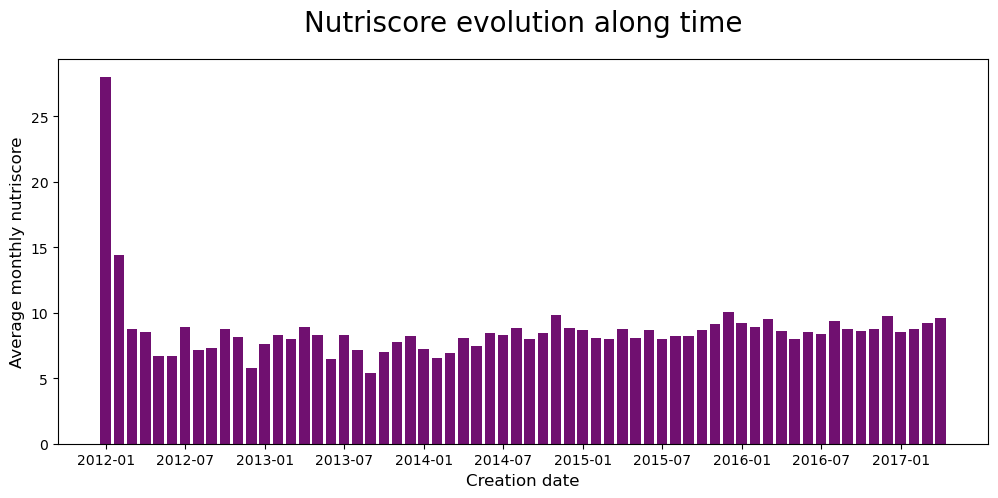

In [14]:
monthly_energy = df.groupby(pd.PeriodIndex(df['created_datetime'], freq="M"))['nutrition-score-fr_100g'].mean()
monthly_energy.index
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_energy.index, y=monthly_energy.values, color='purple')
#plt.xticks(rotation=10)
plt.title('Nutriscore evolution along time', fontsize=20, loc='center', y=1.05)
plt.xlabel('Creation date', fontsize=12)
plt.ylabel('Average monthly nutriscore', fontsize=12)
plt.locator_params(axis='x', nbins=12)
plt.savefig("evolution_nutriscore_temps.png", transparent=True, bbox_inches='tight')
plt.show()


## 2.3 Matrice des corrélations

In [16]:
df2 = df[['energy_100g','proteins_100g','salt_100g','sugars_100g','fat_100g','carbohydrates_100g','saturated-fat_100g',
   'fiber_100g','nutrition-score-fr_100g']]

<Figure size 800x700 with 0 Axes>

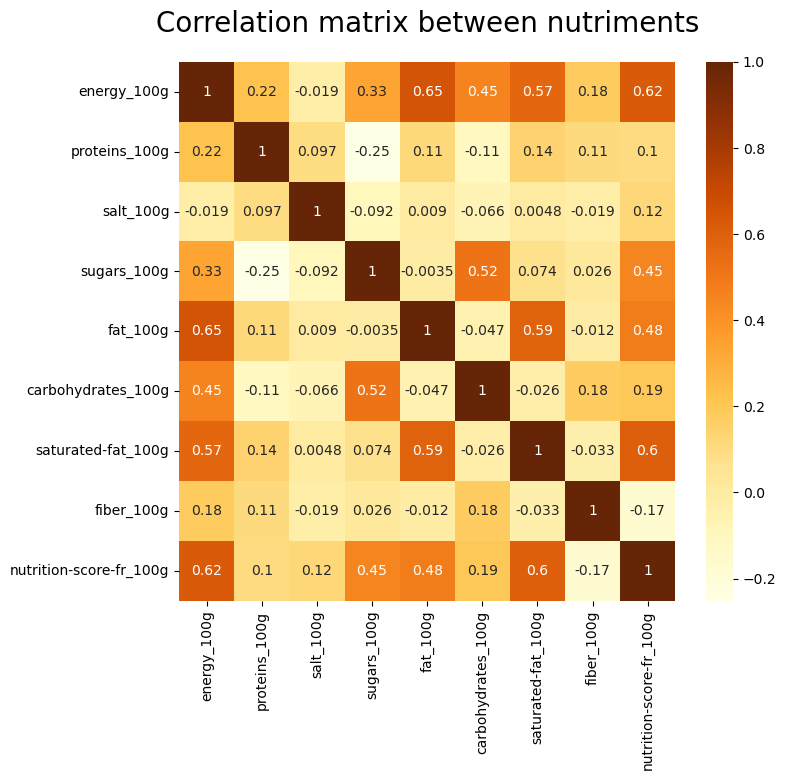

In [17]:
plt.figure(figsize=(8, 7))
sns.heatmap(df2.corr(), annot=True, cmap="YlOrBr")
plt.title('Correlation matrix between nutriments', fontsize=20, y=1.04)
plt.savefig("matrice_des_correlations.png", transparent=True, bbox_inches='tight')
plt.show()

<div class="alert alert-block alert-info">
    
Observed correlations:
    
|Reference|Correlations|
|:---:|:---|
|energy|fat, proteins, carbohydrates|
|carbohydrates|sugar, fiber
|fat|saturated fat


|Reference|Anti-corrélations|
|:---:|:---|
|proteins|sugar
    
Absence of correlation with salt
</div>

# <a name="C3">3. Other multivariate analysis</a>

# 3.1 PCA Principal Component Analysis

In [16]:
df.describe()

,Unnamed: 0,code,energy_100g,proteins_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
count,61078.000000,6.107800e+04,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000,61078.000000
mean,229889.725761,3.846449e+12,1101.117482,7.723335,13.219235,11.723449,25.804589,5.360208,1.808232,1.138952,17.604594,8.597416
std,41095.389460,5.326052e+12,757.028682,7.813941,18.903827,14.418493,23.666832,8.444688,3.806994,4.033253,23.718996,9.025220
min,106.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,203700.250000,3.242273e+12,428.000000,1.800000,1.000000,2.400000,6.900000,0.300000,0.000000,0.080000,0.000000,1.000000
50%,225943.500000,3.329770e+12,1032.000000,6.000000,4.000000,8.000000,21.400000,1.900000,0.100000,0.560000,0.000000,8.000000
75%,249778.750000,3.662762e+12,1636.000000,10.900000,17.000000,15.000000,40.000000,7.300000,2.400000,1.244600,35.000000,15.000000
max,320763.000000,3.661112e+14,3700.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


In [18]:
# Choice of nb of components
n_comp = 6

# Features selection for PCA
data_pca = df[['energy_100g','proteins_100g','salt_100g','sugars_100g','fat_100g',
               'carbohydrates_100g','saturated-fat_100g','fiber_100g','nutrition-score-fr_100g']] #----------------------

              #'sodium_100g',
              # 'vitamin-a_100g','vitamin-b1_100g','vitamin-b12_100g',
              #'vitamin-c_100g','vitamin-d_100g','calcium_100g','iron_100g',
              #'potassium_100g','magnesium_100g','phosphorus_100g',
              #'zinc_100g','copper_100g','selenium_100g','iodine_100g'

# Preparing data for PCA
data_pca = data_pca.fillna(data_pca.mean()) #----------------------
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés #----------------------
features = data_pca.columns

# Standard scaling
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Principal components calculation
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

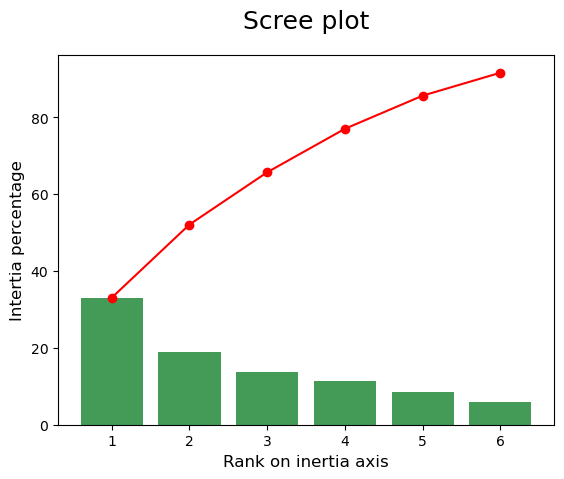

In [19]:
# Scree plot
def display_scree_plot2(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Rank on inertia axis", fontsize=12)
    plt.ylabel("Intertia percentage", fontsize=12)
    plt.title("Scree plot", fontsize=18, y=1.05)
    plt.savefig("eboulis.png", transparent=True, bbox_inches='tight')
    plt.show(block=False)
    
display_scree_plot2(pca)

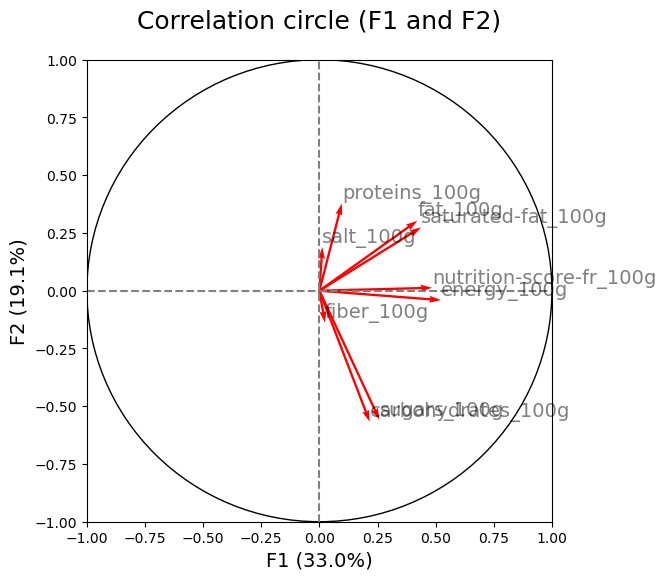

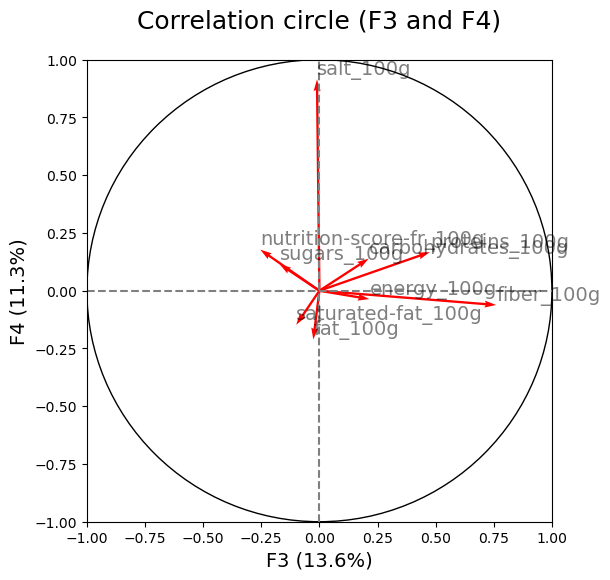

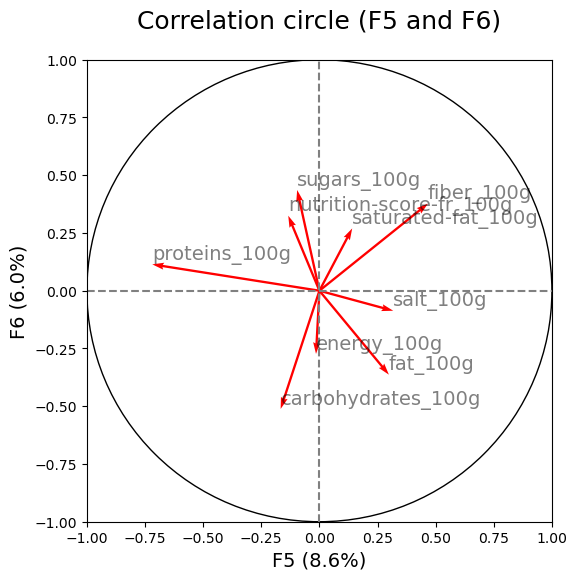

In [20]:
# Correlation circles

def display_circles2(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(6,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="red", width=0.005)
                # (voir la doc : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='left', va='bottom', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)), fontsize=14)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)), fontsize=14)

            plt.title("Correlation circle (F{} and F{})".format(d1+1, d2+1), fontsize=18, y=1.05)
            plt.savefig("Cercle_des_corrélations_(F{}_et_F{})".format(d1+1, d2+1), transparent=True, bbox_inches='tight')
            plt.show(block=False)


pcs = pca.components_
display_circles2(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



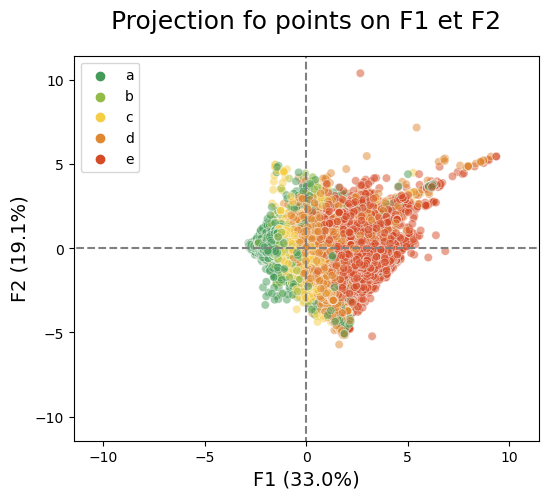

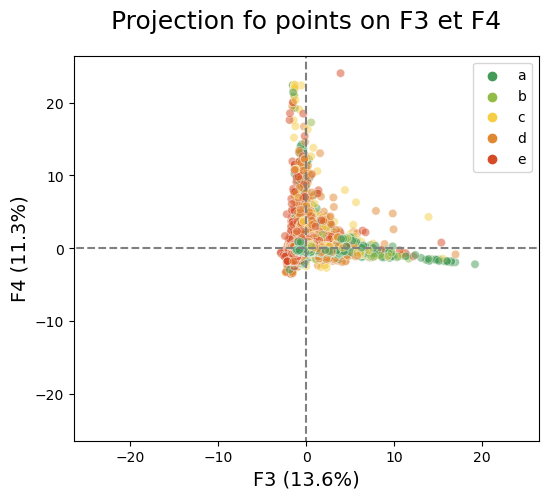

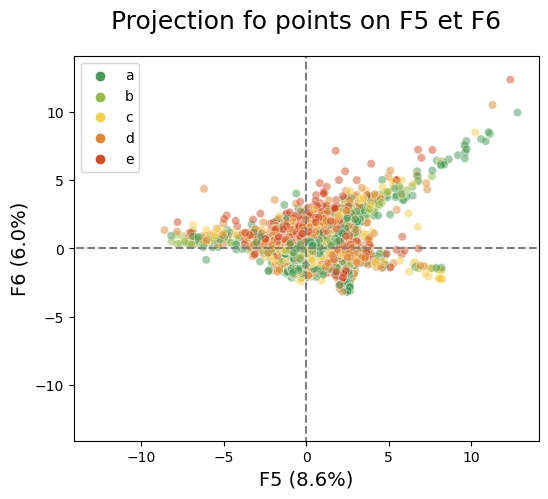

In [21]:
# Projection of points

def display_factorial_planes2(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:        
            
            # initialisation de la figure       
            fig = plt.figure(figsize=(6,5))

            # affichage des points
            palette = {'a':'#449B57', 'b':'#92BB47', 'c':'#F6CE46', 'd':'#E08831', 'e':'#D54B26'}
            sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2], alpha=alpha, 
                            hue=df['nutrition_grade_fr'], palette=palette, hue_order=['a','b','c','d','e'])
            plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)), fontsize=14)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)), fontsize=14)

            plt.title("Projection fo points on F{} et F{}".format(d1+1, d2+1), fontsize=18, y=1.05)
            plt.savefig("Projection_des_individus_sur(F{}_et_F{})".format(d1+1, d2+1), transparent=True, bbox_inches='tight')
            plt.show(block=False)
            

X_projected = pca.transform(X_scaled)
display_factorial_planes2(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha=0.5)

plt.show()

# 3.2 ANOVA

In [23]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

### 3.2.1 ANOVA on nutrigrade

In [24]:
nutriment = []
ANOVA_result = []
for i in ['energy_100g','proteins_100g','sugars_100g','fat_100g',
               'carbohydrates_100g','saturated-fat_100g','fiber_100g','salt_100g']:     
        nutriment.append(i)
        ANOVA_result.append(eta_squared(df['nutrition_grade_fr'],df[i]))
anova = pd.DataFrame(np.column_stack([nutriment, ANOVA_result]), columns=['Nutriment', 'ANOVA_result'])
anova['ANOVA_result'] = anova['ANOVA_result'].astype(float)
anova = anova.sort_values('ANOVA_result', ascending=False)
anova

,Nutriment,ANOVA_result
5,saturated-fat_100g,0.322268
0,energy_100g,0.314216
3,fat_100g,0.181709
2,sugars_100g,0.165328
6,fiber_100g,0.055449
4,carbohydrates_100g,0.033878
1,proteins_100g,0.019938
7,salt_100g,0.007423


<Figure size 600x600 with 0 Axes>

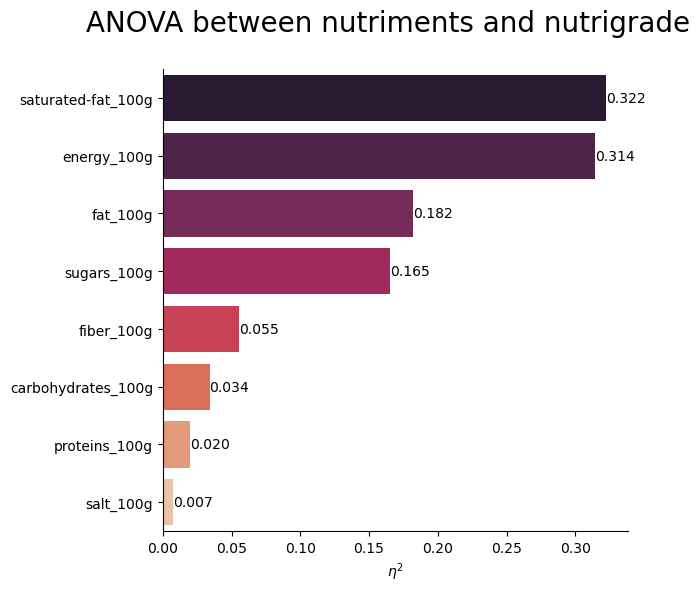

In [25]:
plt.figure(figsize=(6,6)).suptitle('ANOVA between nutriments and nutrigrade', fontsize=20)

ax = sns.barplot(y=anova['Nutriment'],
                 x=anova['ANOVA_result'],
                 palette="rocket")
container = ax.containers[0]
ax.bar_label(container,
             labels=[f'{x:.3f}' for x in container.datavalues])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("$\eta^{2}$")
plt.ylabel('')
plt.savefig("anova_nutriments_nutrigrade.png", transparent=True, bbox_inches='tight')
plt.show()

### 3.2.2 ANOVA sur les catégories

In [26]:
nutriment2 = []
ANOVA_result2 = []
for i in ['energy_100g','proteins_100g','sugars_100g','fat_100g',
               'carbohydrates_100g','saturated-fat_100g','fiber_100g', 'salt_100g']:     
        nutriment2.append(i)
        ANOVA_result2.append(eta_squared(df['pnns_groups_1'],df[i]))
anova2 = pd.DataFrame(np.column_stack([nutriment2, ANOVA_result2]), columns=['Nutriment', 'ANOVA_result'])
anova2['ANOVA_result'] = anova2['ANOVA_result'].astype(float)
anova2 = anova2.sort_values('ANOVA_result', ascending=False)
anova2

,Nutriment,ANOVA_result
4,carbohydrates_100g,0.596667
0,energy_100g,0.352933
3,fat_100g,0.338884
2,sugars_100g,0.327123
1,proteins_100g,0.287443
5,saturated-fat_100g,0.141419
6,fiber_100g,0.090886
7,salt_100g,0.024161


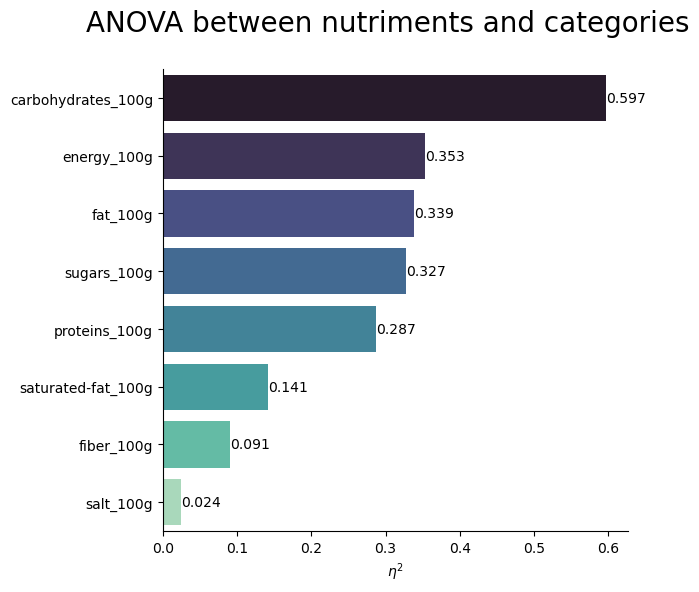

In [29]:
plt.figure(figsize=(6,6)).suptitle('ANOVA between nutriments and categories', fontsize=20)
ax = sns.barplot(y=anova2['Nutriment'],
                 x=anova2['ANOVA_result'],
                 palette="mako")
container = ax.containers[0]
ax.bar_label(container,
             labels=[f'{x:.3f}' for x in container.datavalues])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("$\eta^{2}$")
plt.ylabel('')
plt.savefig("anova_nutriments_categories.png", transparent=True, bbox_inches='tight')
plt.show()